In [2]:
#importing the packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
import itertools


In [3]:
!ls

8d4fdcca-fb4a-414a-860f-6744817963a7.webp
Concrete_Data.xls
Project proposal  Part 1 and 2.pdf
best_model
concrete copy.png
concrete.jpg
concrete_strength.ipynb
neon.png
project_with_gui.py


In [6]:
#ingesting the data
df = pd.read_excel("Concrete_Data.xls")

In [7]:
#displaying the dataframe
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [8]:
#calculating the corretlation matrix
correlation_matrix = df.corr()

In [9]:
#there is no highly correlated columns or features 
correlation_matrix[correlation_matrix > 0.9]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blast Furnace Slag (component 2)(kg in a m^3 mixture),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fly Ash (component 3)(kg in a m^3 mixture),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Water (component 4)(kg in a m^3 mixture),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Superplasticizer (component 5)(kg in a m^3 mixture),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Coarse Aggregate (component 6)(kg in a m^3 mixture),NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Fine Aggregate (component 7)(kg in a m^3 mixture),NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Age (day),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
"Concrete compressive strength(MPa, megapascals)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [10]:
#Creating the dataframe that doesnt include the target values in preparation for ML model
df_without_label = df.iloc[:, :-1]

In [11]:
#making sure the target values were omitted properly
df_without_label

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [12]:
#defining the pipeline for scaling the data through the sklearn libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/1.5/modules/preprocessing.html

preprocessor = ColumnTransformer(
    transformers=[
        ('scalingAndVectorizer', StandardScaler(), df_without_label.columns.tolist())
    ]
)


In [13]:
#fitting the dataframe without label to the pipeline and transforming
transformed_data = preprocessor.fit_transform(df_without_label)

In [14]:
transformed_data.shape

(1030, 8)

In [15]:
#separating the target values only from the main dataframe for the training
df_label = df.iloc[:, -1]

In [16]:
#sklean expects numpy array for the labels, thus converting the target value pandas dataframe to numpy
label = df_label.to_numpy()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_data, label, test_size=0.3, random_state=42)
#https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html

In [90]:
import torch
#defining function to turn numpy to Torch
def pandas_to_torch(x, y):
    x_flt = x.astype(np.float32)
    y_flt = y.astype(np.float32)    
    x = torch.from_numpy(x_flt)
    y = torch.from_numpy(y_flt)

    
    return x, y

#converting Pandas df to Torch
x_train, y_train = pandas_to_torch(X_train, y_train)
x_test, y_test = pandas_to_torch (X_test, y_test)

In [91]:
x_train

tensor([[-0.8280, -0.8569,  0.7243,  ...,  0.4308,  1.6512, -0.2797],
        [ 0.4196, -0.8569, -0.8471,  ...,  1.1591,  0.1176, -0.6123],
        [ 0.3603,  1.6072, -0.8471,  ..., -1.5546,  1.3330, -0.6757],
        ...,
        [-0.8695, -0.8569,  1.1099,  ...,  1.3650,  0.3160,  0.8606],
        [ 1.8556,  0.5207, -0.8471,  ..., -1.5546,  0.0988, -0.2797],
        [ 0.3143, -0.8569,  0.9194,  ..., -0.6166,  0.1176, -0.2797]])

In [92]:
#CREATING CUSTOM DATALOAD AND DATASET
from torch.utils.data import Dataset, DataLoader
class MyDataset(Dataset): 
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return (self.x[idx],self.y[idx])

training_set = MyDataset(x_train, y_train)
testing_set = MyDataset(x_test, y_test)

In [93]:
###
# USING MPS ACCELARATION FOR FASTER PROCESSING
###
import torch

if torch.backends.mps.is_available():
    print("MPS backend is available!")
else:
    print("MPS backend is not available.")

# Using the MPS acceleration
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

MPS backend is available!


In [ ]:
#checking the dimensions of the trainnig and testing sets
x_train.shape

torch.Size([721, 8])

In [95]:
y_train.shape

torch.Size([721])

In [96]:
x_test.shape

torch.Size([309, 8])

In [97]:
y_test.shape

torch.Size([309])

# Setting up PyTorch NN Regressor

In [626]:
#DEFINING THE CLASS FOR THE MLP MODEL
from torch import nn
class myMultiLayerPerceptron(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        self.sequential = nn.Sequential(  # here we stack multiple layers together
            nn.Linear(input_dim,16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32,8),
            nn.ReLU(),
            nn.Linear(8,4),
            nn.ReLU(),
            nn.Linear(4,output_dim)   
        )
    def forward(self,x):
        y = self.sequential(x)
        return y

In [627]:
mymodel_hyper = myMultiLayerPerceptron(8, 1) # creating a model instance with input dimension 31 and output dimension 1
mymodel_hyper.to(device)
print(mymodel_hyper)

myMultiLayerPerceptron(
  (sequential): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=4, bias=True)
    (7): ReLU()
    (8): Linear(in_features=4, out_features=1, bias=True)
  )
)


In [ ]:
# building hyperparameters grid to search
lr_values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
batch_sizes = [8, 16, 32, 64, 128]

N_epochs = 20

#INITIALIZING THE LOSS FOR LATER COMPARISON
best_validate_loss = float('inf')
best_params = {}

loss_fun = nn.MSELoss() #Mean Square Loss
losses_per_epoch = []
raw_batch_loss = []
for lr, batch_size in itertools.product(lr_values, batch_sizes):
    mymodel_hyper = myMultiLayerPerceptron(8, 1)
    mymodel_hyper.to(device)
    #https://docs.python.org/3/library/itertools.html
    optimizer = torch.optim.Adam(mymodel_hyper.parameters(), lr=lr)

    train_dataloader = DataLoader(training_set, batch_size=batch_size, shuffle=True)

    

    for epoch in range(N_epochs):
        batch_loss = []
        ###
        # TRAINING LOOP
        ###
        for x_batch, y_batch in train_dataloader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            prediction_score = mymodel_hyper(x_batch).squeeze(-1) 
            loss = loss_fun(prediction_score, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            batch_loss.append(loss.detach().cpu().numpy())

        ###
        # APPENDING LOSSES and R2
        ###
        losses_per_epoch.append(np.mean(np.array(batch_loss)))
        raw_batch_loss.append(np.array(batch_loss))

        if losses_per_epoch[-1] < best_validate_loss:
            best_validate_loss = losses_per_epoch[-1]
            print("Saving model...\n")
            torch.save(mymodel_hyper.state_dict(), "best_model")
            best_params = {"learning_rate": lr, "batch_sizes": batch_size}
            

            

        print(f"For lr={lr} and batch_size={batch_size}\n, Epoch = {epoch}, train_loss={losses_per_epoch[-1]}\n")

Saving model...

For lr=0.0001 and batch_size=8
, Epoch = 0, train_loss=1567.29345703125

Saving model...

For lr=0.0001 and batch_size=8
, Epoch = 1, train_loss=1559.1258544921875

Saving model...

For lr=0.0001 and batch_size=8
, Epoch = 2, train_loss=1554.64892578125

For lr=0.0001 and batch_size=8
, Epoch = 3, train_loss=1571.169677734375

Saving model...

For lr=0.0001 and batch_size=8
, Epoch = 4, train_loss=1531.8778076171875

Saving model...

For lr=0.0001 and batch_size=8
, Epoch = 5, train_loss=1522.74755859375

Saving model...

For lr=0.0001 and batch_size=8
, Epoch = 6, train_loss=1513.6478271484375

Saving model...

For lr=0.0001 and batch_size=8
, Epoch = 7, train_loss=1460.6160888671875

Saving model...

For lr=0.0001 and batch_size=8
, Epoch = 8, train_loss=1415.2674560546875

Saving model...

For lr=0.0001 and batch_size=8
, Epoch = 9, train_loss=1323.9061279296875

Saving model...

For lr=0.0001 and batch_size=8
, Epoch = 10, train_loss=1218.2127685546875

Saving mode

In [631]:
best_params

{'learning_rate': 0.01, 'batch_sizes': 8}

# Different model

In [632]:
#DEFINING THE CLASS FOR THE MLP MODEL
from torch import nn
class myMultiLayerPerceptron(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        self.sequential = nn.Sequential(  # here we stack multiple layers together
            nn.Linear(input_dim,16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32,8),
            nn.ReLU(),
            nn.Linear(8,4),
            nn.ReLU(),
            nn.Linear(4,output_dim)   
        )
    def forward(self,x):
        y = self.sequential(x)
        return y

In [633]:
mymodel_hyper = myMultiLayerPerceptron(8, 1) # creating a model instance with input dimension 31 and output dimension 1
mymodel_hyper.to(device)
print(mymodel_hyper)

myMultiLayerPerceptron(
  (sequential): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=4, bias=True)
    (7): ReLU()
    (8): Linear(in_features=4, out_features=1, bias=True)
  )
)


In [634]:
# building hyperparameters grid to search
#For lr=0.1 and batch_size=32
lr = 0.01
batch_size = 8
N_epochs = 400

#INITIALIZING THE LOSS FOR LATER COMPARISON
best_validate_loss = float('inf')
best_params = {}

loss_fun = nn.MSELoss() #Mean Square Loss

optimizer = torch.optim.Adam(mymodel_hyper.parameters(), lr=lr)

train_dataloader = DataLoader(training_set, batch_size=batch_size, shuffle=True)

losses_per_epoch = []
raw_batch_loss = []

for epoch in range(N_epochs):
    batch_loss = []
        ###
        # TRAINING LOOP
        ###
    for x_batch, y_batch in train_dataloader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        prediction_score = mymodel_hyper(x_batch).squeeze(-1) 
        loss = loss_fun(prediction_score, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.detach().cpu().numpy())

        ###
        # APPENDING LOSSES and R2
        ###
    losses_per_epoch.append(np.mean(np.array(batch_loss)))
    raw_batch_loss.append(np.array(batch_loss))

    print(f"For lr={lr} and batch_size={batch_size}\n, Epoch = {epoch}, train_loss={losses_per_epoch[-1]}\n")

    if losses_per_epoch[-1] < best_validate_loss:
        best_validate_loss = losses_per_epoch[-1]
        print("Saving model...\n")
        torch.save(mymodel_hyper.state_dict(), "best_model")
        best_params = {"learning_rate": lr, "batch_sizes": batch_size}

For lr=0.01 and batch_size=8
, Epoch = 0, train_loss=693.8685302734375

Saving model...

For lr=0.01 and batch_size=8
, Epoch = 1, train_loss=143.84307861328125

Saving model...

For lr=0.01 and batch_size=8
, Epoch = 2, train_loss=128.12342834472656

Saving model...

For lr=0.01 and batch_size=8
, Epoch = 3, train_loss=132.2449493408203

For lr=0.01 and batch_size=8
, Epoch = 4, train_loss=134.85699462890625

For lr=0.01 and batch_size=8
, Epoch = 5, train_loss=117.62342071533203

Saving model...

For lr=0.01 and batch_size=8
, Epoch = 6, train_loss=119.76118469238281

For lr=0.01 and batch_size=8
, Epoch = 7, train_loss=115.80081176757812

Saving model...

For lr=0.01 and batch_size=8
, Epoch = 8, train_loss=115.8340835571289

For lr=0.01 and batch_size=8
, Epoch = 9, train_loss=116.58826446533203

For lr=0.01 and batch_size=8
, Epoch = 10, train_loss=109.46564483642578

Saving model...

For lr=0.01 and batch_size=8
, Epoch = 11, train_loss=112.84386444091797

For lr=0.01 and batch_s

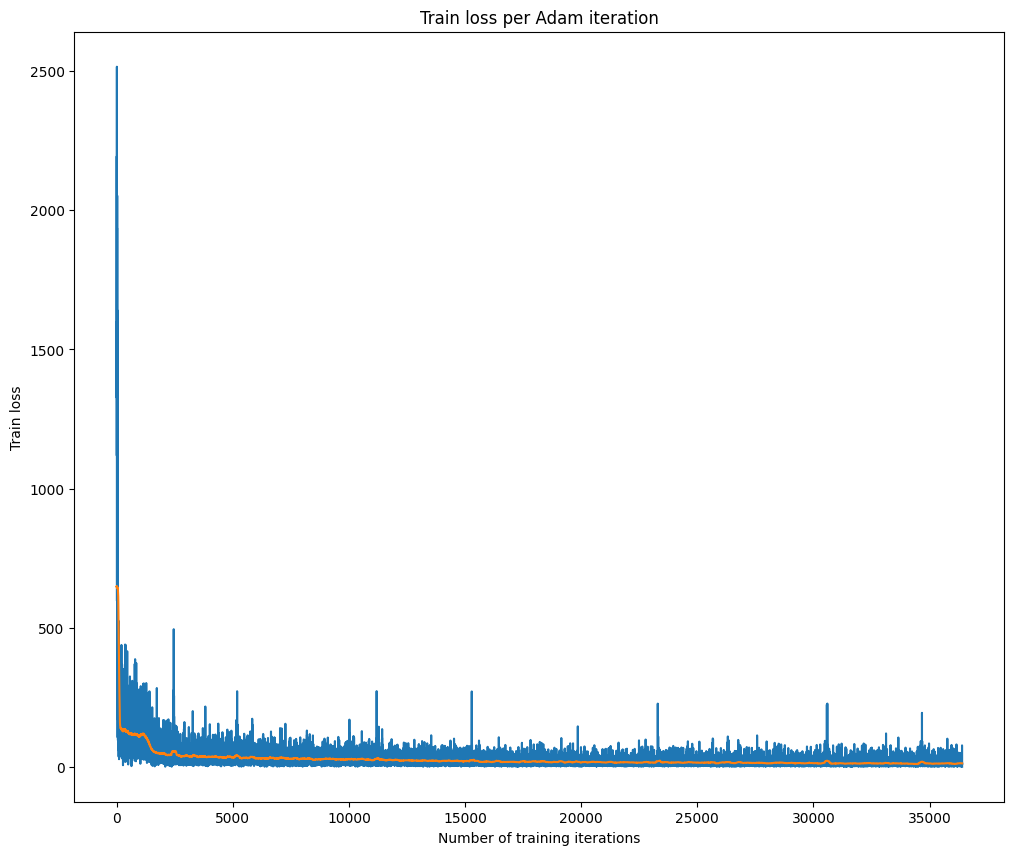

In [635]:
from matplotlib import pyplot as plt
###
# Graph for train loss per Adam iteration
###
plt.figure(figsize = (12, 10))
combined_array = np.concatenate(raw_batch_loss)
x = range(1, len(combined_array)+1)
y = combined_array
plt.plot(x, y)
plt.title("Train loss per Adam iteration")
plt.xlabel("Number of training iterations")
plt.ylabel("Train loss")

###
# Because there are so many iterations, I have added smoothing to show the general trend in yellow.
###
from scipy.ndimage import uniform_filter1d
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.uniform_filter1d.html
smoothed_y = uniform_filter1d(y, size=200)
plt.plot(x, smoothed_y)

In [636]:
best_model = myMultiLayerPerceptron(8, 1)
best_model.to(device)
best_model.load_state_dict(torch.load("best_model"))

/var/folders/c5/p6q0gjzj2ns5lv27n9yp07ph0000gn/T/ipykernel_43602/3185701737.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load("best_m

<All keys matched successfully>

In [637]:
#RUNNING TESTING SET ON THE BEST MODEL SO FAR
batch_size = 64
test_dataloader = DataLoader(testing_set,batch_size = batch_size,shuffle = True)
loss_fun = nn.MSELoss()
targets = []
predictions = []
batch_loss = []
with torch.no_grad():
    best_model.eval()
    for x_batch, y_batch in test_dataloader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        prediction_score = best_model(x_batch).squeeze(-1)
        loss = loss_fun(prediction_score, y_batch)
        batch_loss.append(loss.detach().cpu())
        
        targets.append(y_batch.cpu())
        predictions.append(prediction_score.cpu())
            
###
# APPENDNING LOSSES and R2
###
test_loss = np.mean(np.array(batch_loss))

#CALCULATING THE R2
targets_per_batch = torch.cat(targets).numpy()
predictions_per_batch = torch.cat(predictions).numpy()
ssr = np.sum((targets_per_batch - predictions_per_batch)**2)
sst = np.sum((targets_per_batch - np.mean(targets_per_batch))**2)
r2 = 1 - ssr/sst
#https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html
    
print(f"test_loss={test_loss}, R2 = {r2}")

test_loss=30.18462562561035, R2 = 0.8882950842380524


# Random forest regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

regr = RandomForestRegressor(n_estimators=2000, max_depth=60, random_state=0)
regr.fit(X_train, y_train)
prediction_train = regr.predict(X_train)
prediction_test = regr.predict(X_test)

In [19]:
mse = mean_squared_error(y_train, prediction_train)

In [20]:
mse

np.float64(3.9102897843172784)

In [21]:
mse_test = mean_squared_error(y_test, prediction_test)

In [22]:
mse_test

np.float64(30.366011313811658)

In [23]:
r2_score(y_test, prediction_test)

0.8877735813425007

# Gradient boost

In [24]:
reg = GradientBoostingRegressor(random_state=0, learning_rate=0.31, n_estimators=500)
reg.fit(X_train, y_train)
prediction_test_gb = reg.predict(X_test)

In [25]:
mse_test = mean_squared_error(y_test, prediction_test_gb)

In [26]:
mse_test

np.float64(18.041025150906613)

In [27]:
r2_score(y_test, prediction_test_gb)

0.9333241491392313

In [28]:
X_test.shape

(309, 8)

In [29]:
X_test

array([[-0.14518623,  0.46504884, -0.84713204, ..., -0.52651395,
        -1.2925307 ,  5.05767679],
       [ 0.77960154,  1.33474302, -0.84713204, ..., -0.36309858,
        -0.22185751, -0.61233136],
       [ 1.04095461,  1.33474302, -0.84713204, ..., -0.36309858,
        -0.22185751, -0.27973311],
       ...,
       [-0.03987914, -0.85688631, -0.84713204, ..., -0.06328926,
         1.02850909,  2.12764465],
       [ 1.85564861, -0.85688631, -0.84713204, ..., -0.52651395,
        -2.24091255, -0.27973311],
       [-0.0380602 ,  0.27742681, -0.46473778, ...,  1.14238167,
         0.11082486,  0.16373121]])

In [36]:
#testing with different values
test = np.array([266.0,114.0,0.0,228.0,0.0,932.0, 670.0, 90])
test2 = np.array([190.3, 0.0, 125.2, 161.9, 9.9, 1088.1, 802.6, 3])

In [37]:
test2.shape

(8,)

In [38]:
import pandas as pd

# creating DataFrame for test2 with the same columns as df_without_label
test2_df = pd.DataFrame([test2], columns=df_without_label.columns)

# transforming test data using the preprocessor
test2_scaled = preprocessor.transform(test2_df)

In [39]:
test2_scaled

array([[-0.86989053, -0.85688631,  1.11017627, -0.92134819,  0.61918296,
         1.48207978,  0.36214605, -0.6756834 ]])

In [40]:
prediction_testing = reg.predict(test2_scaled)

In [41]:
#getting the prediction from the model
prediction_testing[0]

np.float64(10.291289549610855)